# 建立twitter和foursquare的节点图

In [1]:
# 将twitter和foursqure的用户和用户属性存入，并且在foursquare图中存入已知的anchor links
# 因为假设是基于full-aligned social network，所以只选取anchor users组成网络
# 是在全对齐上假设结果比较好，源数据集信息并不进行改动的结果比较好？
# 在互相关注和单向关注这样的切面考虑，在此基础上寻找特征进行训练
# 训练的方式怎么确定？几折交叉验证的数据集训练集过大的问题？
# 用户人数/follow关系链接数，到达一个比列留单向还是双向的
# 协同过滤或者simrank

import re
import networkx as nx
import random

four_G = nx.Graph()      # 无向图 
tw_G = nx.Graph()
four_Di_G = nx.DiGraph() # 有向图
tw_Di_G = nx.DiGraph()  
f_anchor_known_list = [] # 设定的事先知道的anchor link foursquare
t_anchor_known_list = [] # 设定的事先知道的anchor link twitter
f_all_anchor_list = []    # 数据集中所有的foursqauare anchor user
t_all_anchor_list = []    # 数据集中所有的twitter anchor user
# 
f = open('foursquare/users/user', encoding='utf-8')
twitter_file = open('twitter/user', encoding='utf-8')
for line in twitter_file:
    tw_list = line.split('\t')
    user_name = tw_list[0]
    if(len(user_name) > 1 and len(tw_list) >= 5):
        tw_G.add_node(user_name, in_test=0, time='',location='', word='', fourID=None)
        tw_Di_G.add_node(user_name)

# random_list = []   # 随机生成提前知道的anchor user数
# random_num = 250   # 控制已知数量
# random_list = random.sample(range(1,1588), random_num)
# print(random_list)
# # random_list = [1376, 1577, 552, 244, 1384, 1464, 959, 413, 1171, 1420, 149, 126, 658, 607, 867, 896, 1322, 129, 1111, 91, 573, 664, 721, 529, 1172, 1490, 146, 45, 852, 1424, 1284, 1186, 1407, 131, 698, 967, 1562, 991, 893, 838, 929, 1255, 1238, 772, 503, 626, 1181, 753, 1218, 1405, 433, 254, 470, 1326, 932, 1461, 653, 922, 563, 973, 1259, 1413, 297, 1551, 259, 106, 326, 382, 538, 613, 163, 392, 532, 787, 1294, 724, 1305, 1264, 348, 518, 936, 811, 543, 667, 100, 1340, 457, 745, 311, 1211, 1018, 204, 707, 230, 1053, 1266, 968, 1363, 1309, 568, 1275, 362, 1183, 451, 940, 1558, 1177, 332, 1569, 402, 209, 172, 812, 240, 1165, 1365, 272, 747, 27, 1071, 1452, 768, 171, 1578, 541, 1196, 545, 110, 1225, 1581, 280, 1098, 1005, 1076, 1587, 964, 884, 182, 505, 1145, 1100, 125, 1526, 662, 1338, 506, 988, 1121, 201, 638, 1110, 1096, 134, 1006, 782, 422, 234, 601, 955, 1178, 1362, 1227, 1306, 752, 1187, 498, 885, 236, 1013, 550, 1441, 630, 557, 1542, 1492, 700, 36, 1483, 741, 1380, 1108, 1067, 39, 1512, 1094, 246, 1330, 13, 208, 274, 800, 194, 1136, 985, 1538, 222, 471, 536, 1214, 925, 327, 1175, 558, 3, 1507, 587, 710, 750, 456, 339, 919, 416, 717, 18, 1524, 819, 1398, 909, 1343, 668, 1160, 82, 196, 858, 687, 521, 690, 764, 130, 76, 1570, 742, 703, 406, 440, 1455, 1310, 6, 1534, 831, 1499, 993, 67, 384, 842, 1386, 35, 1514, 410, 1285, 1194, 652, 1423, 183, 866, 89, 320, 104, 1052, 1428, 140, 760, 1437, 978, 1085, 1003, 376, 1367, 459, 1480, 341, 323, 176, 421, 108, 1307, 359, 1395, 599, 64, 1025, 85, 1212, 933, 334, 158, 271, 79, 1010, 1021, 112, 1256, 1180, 1576, 1139, 1529, 1011, 1323, 879, 559]
# random_list = [1376, 1577, 552, 244, 1384, 1464, 959, 413, 1171, 1420, 149, 126, 658, 607, 867, 896, 1322, 129, 1111, 91, 573, 664, 721, 529, 1172, 1490, 146, 45, 852, 1424, 1284, 1186, 1407, 131, 698, 967, 1562, 991, 893, 838, 929, 1255, 1238, 772, 503, 626, 1181, 753, 1218, 1405, 433, 254, 470, 1326, 932, 1461, 653, 922, 563, 973, 1259, 1413, 297, 1551, 259, 106, 326, 382, 538, 613, 163, 392, 532, 787, 1294, 724, 1305, 1264, 348, 518, 936, 811, 543, 667, 100, 1340, 457, 745, 311, 1211, 1018, 204, 707, 230, 1053, 1266, 968, 1363, 1309, 568, 1275, 362, 1183, 451, 940, 1558, 1177, 332, 1569, 402, 209, 172, 812, 240, 1165, 1365, 272, 747, 27, 1071, 1452, 768, 171, 1578, 541, 1196, 545, 110, 1225, 1581, 280, 1098, 1005, 1076, 1587, 964, 884, 182, 505, 1145, 1100, 125, 1526, 662, 1338, 506, 988, 1121, 201, 638, 1110, 1096, 134, 1006, 782, 422, 234, 601, 955, 1178, 1362, 1227, 1306, 752, 1187, 498, 885, 236, 1013, 550, 1441, 630, 557, 1542, 1492, 700, 36, 1483, 741, 1380, 1108, 1067, 39, 1512, 1094, 246, 1330, 13, 208, 274, 800, 194, 1136, 985, 1538, 222, 471, 536, 1214, 925, 327, 1175, 558, 3, 1507, 587, 710, 750, 456, 339, 919, 416, 717, 18, 1524, 819, 1398, 909, 1343, 668, 1160, 82, 196, 858, 687, 521, 690, 764, 130, 76, 1570, 742, 703, 406, 440, 1455, 1310, 6, 1534, 831, 1499, 993, 67, 384, 842, 1386, 35, 1514, 410, 1285, 1194, 652, 1423, 183, 866, 89, 320, 104, 1052, 1428, 140, 760, 1437, 978, 1085, 1003, 376, 1367, 459, 1480, 341, 323, 176, 421, 108, 1307, 359, 1395, 599, 64, 1025, 85, 1212, 933, 334, 158, 271, 79, 1010, 1021, 112, 1256, 1180, 1576, 1139, 1529, 1011, 1323, 879, 559]

# foursquare 目前只将对应的twitterid存了进去，其它的属性未存\n",  location=tw_list[4],  realname=tw_list[2], bio=tw_list[3], home=tw_list[4],
num = 0
for line in f:
    lis = line.split('\t')
    userFourID = lis[0]
    if('com' in lis[7]):
        userTwitterID = lis[7].split('twitter.com/')[1]
        if(tw_G.has_node(userTwitterID)):
            num = num + 1
            four_G.add_node(userFourID, twitterID=userTwitterID, location='', time='', word='', in_test=0)
            four_Di_G.add_node(userFourID)
            tw_G.node[userTwitterID]["fourID"] = userFourID   # 标明 tw对应的four ID
            f_all_anchor_list.append(userFourID)
            t_all_anchor_list.append(userTwitterID)
            # 测试五折交叉的全对齐网络
        else:
            four_G.add_node(userFourID, twitterID=None, location='', time='', word='', in_test=0)   # 这里在后面考虑是否需要加进去，加进去就是partial aligned
            four_Di_G.add_node(userFourID)
print("length of already known anchor list:", len(f_anchor_known_list), len(t_anchor_known_list))
f.close()
twitter_file.close()
# # remove to full aligned twitter network
# remove_node_list = []
# for item in tw_G.nodes(data=True):
#     if(item[1]["in_test"] != 1):
#         remove_node_list.append(item[0])
# tw_G.remove_nodes_from(remove_node_list)

# 对于twitter的节点进行处理，进行去边缘化
tw_f = open('twitter/following')
for line in tw_f:
    user1 = line.split('\t')[0]
    user2 = line.split('\t')[1].split('\n')[0]
    if(tw_G.has_node(user1) and tw_G.has_node(user2)):
        if(tw_G.has_edge(user2, user1)):
            tw_G.edges[user2, user1]["weight"] = 2
            if(user1 in t_anchor_known_list and user2 in f_anchor_known_list):
                f_user1 = tw_G.node[user1]["fourID"]
                f_user2 = tw_G.node[user2]["fourID"]
                four_G.add_edge(f_user1, f_user2, weight=2)
        else:
            tw_G.add_edge(user1, user2, weight=1)
            if(user1 in t_anchor_known_list and user2 in f_anchor_known_list):
                f_user1 = tw_G.node[user1]["fourID"]
                f_user2 = tw_G.node[user2]["fourID"]
                four_G.add_edge(f_user1, f_user2, weight=1)
tw_f.close()
# 有 1588个 anchor user，抽样？一部分作为测试集，一部分作为训练集

length of already known anchor list: 0 0


# 存入用户之间的follow关系

In [63]:
# 构造有向图的follow关系便于取
f = open('foursquare/users/user_following')
for line in f:
    user1 = line.split('\t')[0]
    user2 = line.split('\t')[1].split('\n')[0]
    if(four_Di_G.has_node(user1) and four_Di_G.has_node(user2)):
        four_Di_G.add_edge(user1, user2)

tw_f = open('twitter/following')
for line in tw_f:
    user1 = line.split('\t')[0]
    user2 = line.split('\t')[1].split('\n')[0]
    if(tw_Di_G.has_node(user1) and tw_G.has_node(user2)):
        tw_Di_G.add_edge(user1, user2)

In [2]:
# from networkx.algorithms.community.kclique import k_clique_communities

# # 删除边缘节点，在单向关系存在的基础上
# def del_boundary(G, k):
#     # 删除边缘节点，控制边的入度出度的参数
#     vdict = G.in_degree()         #dictionary of nodes and their in_degrees
#     voutdict = G.out_degree()     #directionary of nodes and their out_degree
#     # 删除入度和出度小于5的点，也就是关注人和被人关注小于五的点
#     G.remove_nodes_from([v for v in G if vdict[v]<k and voutdict[v]<k])
#     return G.to_undirected()

# # k_clique社区聚类
# def k_clique(G, k):
#     communities = list(k_clique_communities(G, k))
#     return communities

# # 根据经验信息和已知的anchor link在两个网络中扩展边
# def extend_network(four_G, tw_G):
#     pass

# 只留相互follow的作为关系
f = open('foursquare/users/user_following')
for line in f:
    user1 = line.split('\t')[0]
    user2 = line.split('\t')[1].split('\n')[0]
    if(four_G.has_node(user1) and four_G.has_node(user2)):
        if(four_G.has_edge(user2, user1)):
            four_G.edges[user2, user1]["weight"] = 2
            if(user1 in f_anchor_known_list and user2 in f_anchor_known_list):
                t_user1 = four_G.node[user1]["twitterID"]
                t_user2 = four_G.node[user2]["twitterID"]
                if(tw_G.has_edge(t_user1, t_user2)):
                    tw_G.edges[t_user2, t_user1]["weight"] = 2
        else:
            four_G.add_edge(user1, user2, weight=1)
            if(user1 in f_anchor_known_list and user2 in f_anchor_known_list):
                t_user1 = four_G.node[user1]["twitterID"]
                t_user2 = four_G.node[user2]["twitterID"]
                tw_G.add_edge(t_user1, t_user2, weight=1)

# foursquare不去掉单向边关系
# four_G.remove_edges_from([e for e in four_G.edges() if four_G.edges[e]["weight"]==1])
# vdict = four_G.degree()
# four_G.remove_nodes_from([v for v in four_G if vdict[v] < 3])
# print("-----------------------------------------------")
# # 控制参数去除边缘节点，并进行k-clique进行社区发现
# four_G = del_boundary(four_G, 5)
# t_communities = k_clique(tw_G, 9)
# tw_G = del_boundary(tw_G, 5)
# k_clique社区聚类

# twitter中删除单向的链接
tw_G.remove_edges_from([e for e in tw_G.edges() if tw_G.edges[e]["weight"]==1])

# 删除边缘节点
vdict = four_G.degree()
r_node = [v for v in four_G if vdict[v] < 1]
for v in r_node:
    if v in f_all_anchor_list:
        f_all_anchor_list.remove(v)
        t_all_anchor_list.remove(four_G.node[v]['twitterID'])
four_G.remove_nodes_from(r_node)

vdict = tw_G.degree()
r_node = [v for v in tw_G if vdict[v] < 1]
for v in r_node:
    if v in t_all_anchor_list:
        t_all_anchor_list.remove(v)
        f_all_anchor_list.remove(tw_G.node[v]['fourID'])
tw_G.remove_nodes_from(r_node)

random_list = random.sample(range(0, len(f_all_anchor_list)), 300)  # 随机生成提前知道的anchor user数
for i in random_list:
    f_anchor_known_list.append(f_all_anchor_list[i])
    four_G.node[f_all_anchor_list[i]]["in_test"] = 1
    t_anchor_known_list.append(t_all_anchor_list[i])
print("length of already known anchor list:", len(f_anchor_known_list), len(t_anchor_known_list))
print("length of all anchor list:", len(f_all_anchor_list), len(t_all_anchor_list))

print(nx.info(tw_G), nx.info(four_G))
# 1588个相互都存在的anchor user

length of already known anchor list: 300 300
length of all anchor list: 1220 1220
Name: 
Type: Graph
Number of nodes: 3572
Number of edges: 30327
Average degree:  16.9804 Name: 
Type: Graph
Number of nodes: 3263
Number of edges: 35165
Average degree:  21.5538


In [103]:
# # 处理度为0的点
# # 删除边缘节点，在单向关系存在的基础上
# def del_boundary(G, k):
#     # 删除边缘节点，控制边的入度出度的参数
#     voutdict = G.degree()     #directionary of nodes and their out_degree
#     # 删除入度和出度小于5的点，也就是关注人和被人关注小于五的点
#     G.remove_nodes_from([v for v in G if voutdict[v] <= k])
#     print(nx.info(G))
# del_boundary(four_G, 1)
# del_boundary(four_G, 1)
# del_boundary(four_G, 1)
num=0
for item in four_G.nodes():
    if item in tw_G.nodes():
        num+=1
print(num)

1586


In [ ]:
# remove to full aligned twitter network
remove_node_list = []
for item in tw_G.nodes():
    if(item in t_anchor_known_list):
        remove_node_list.append(item)
tw_G.remove_nodes_from(remove_node_list)

remove_node_list = []
for item in four_G.nodes():
    if(item in f_anchor_known_list):
        remove_node_list.append(item)
four_G.remove_nodes_from(remove_node_list)


# 计算与社区的距离特征，到每个社区的已知user的最短距离
four_communities = k_clique(four_G, 9)
tw_communities = k_clique(tw_G, 9)
# 到每个社区所有人最短路径，比较一对节点路径之间的anchor user数量
f_anchor_com = []
for item in four_communities:
    f_anchor_com.append([v for v in item if v in f_all_known_list])
t_anchor_com = []
for item in tw_communities:
    t_anchor_com.append([v for v in item if v in t_all_known_list])

for item in f_anchor_com:
    for item1 in t_anchor_com:
        print(len(item), len(item1))
        s = [v for v in item1 if v in item]
        print(len(s))
print("end")
print(len(four_communities), len(tw_communities))


In [65]:
# 根据路径计算相似度   互相关注的话权重就会大一点，即weight=2,到已知的anchor user的最短路径的权重
# # 欧几里得距离
# #计算欧几里德距离：
# def euclidean(p,q):
#     e = 0
#     for i in range(0,len(p)):
#         if(p[i] is not None and q[i] is not None):
#             e+=(p[i] - q[i])**2
#         else:
#             e+=100**2
#     return 1/(1+e**.5)
# s_all = [] # foursquare
# s1_all = []# twitter

# 对每个节点到所有的anchor uset的最短路径长度做向量，后面算向量的相似度
for item in four_Di_G.nodes():
    s = []
    for item2 in f_anchor_known_list:
        try:
            s.append(nx.shortest_path_length(four_Di_G,source=item,target=item2))
        except:
            s.append(None)
    four_G.node[item]["pathlenlist"] = s
for item in tw_Di_G.nodes():
    s = []
    for item2 in t_anchor_known_list:
        try:
            s.append(nx.shortest_path_length(tw_Di_G,source=item,target=item2))
        except:
            s.append(None)
    tw_G.node[item]["pathlenlist"] = s
    
# result = []
# for i in range(0,len(s_all)):
#     r = 0
#     max = []
#     for j in range(0, len(s1_all)):
#         cur = euclidean(s_all[i],s1_all[j])
#         max.append(cur)
#     for item in max:
#         if(item > max[i]):
#             r+=1
#     result.append(r)
# print(result)

# 计算各种特征

In [3]:
# 互关和不互关怎么解决？？？ 对于计算社交网络相似性的方面，怎样将这样的相似性上进行计算？网络的连通性，
# 这里的anchor link这样存储，是否有更好的办法
import math
import requests
import json

def get_city(location):
    r = requests.get(url='http://api.map.baidu.com/geocoder/v2/', params={'location':location,'ak':'9ob1YaUCIxuQkxGEP5qjRwlutG554AYE','output':'json'})
    result = r.json()
    try:
        city = result['result']['addressComponent']['city']
        return city
    except:
        return None

def get_common_location(f_location, t_location):
    common_place = list(set([str(round(float(v.split('_')[0]), 5))+'_'+str(round(float(v.split('_')[1]), 5)) for v in f_location.split(',') if len(v.split('_')) == 2 and v.split('_')[0].isdigit()]).intersection(set([str(round(float(v.split('_')[0]), 6))+'_'+str(round(float(v.split('_')[1]), 5)) for v in t_location.split(',') if len(v.split('_')) == 2 and v.split('_')[0].isdigit()])))
    return len(common_place)

def get_shared_time_slot(f_time, t_time):
    common_time_slot = list(set([x.split(':')[0] for x in f_time.split(',')]).intersection(set([x.split(':')[0] for x in t_time.split(',')])))
    return (len(common_time_slot)-1)

def euclidean(p,q):
    e = 0
    for i in range(0,len(p)):
        if(p[i] is not None and q[i] is not None):
            e+=(p[i] - q[i])**2
        elif(p[i] != None or q[i] != None):
            e+=10**2
    return 1/(1+e**.5)


def tf_idf(f_word, t_word):
    # 分词+去停用词
    stop_word = [line.strip('\n') for line in open('stop_word.txt')]
    f_list = [v.strip('.').strip('/').strip('?').strip('!').strip(':').lower() for v in f_word.split(' ')]
    t_list = [v.strip('.').strip('/').strip('?').strip('!').strip(':').lower() for v in t_word.split('_')]
    for v in f_list:
        if v in stop_word:
            f_list.remove(v)
    for v in t_list:
        if v in stop_word:
            t_list.remove(v)
    t_dict = {}
    for item in list(set(t_list)):
        t_dict[item] = t_list.count(item)
    y = sorted(t_dict.items(), key=lambda x: x[1], reverse=True)
    t_list = [v[0] for v in y[0:20]]
    all_word = list(set(f_list.append(t_list)))               # 所有的词
    f_tf = [f_list.count(v)/len(f_list) for v in all_word]    # 词频
    t_tf = [t_list.count(v)/len(t_list) for v in all_word]
    for v in all_word:
        if(v in f_list and v in t_list):
            idf.append(math.log(3/2))
        else:
            idf.append(math.log(3/1))
    f_tf = [f_tf[i]*idf[i] for i in rang(0,len(idf))]
    t_tf = [t_tf[i]*idf[i] for i in rang(0,len(idf))]
    return euclidean(f_tf,t_tf)
    
print(nx.info(four_G), nx.info(tw_G))
print(len(f_anchor_known_list), len(t_anchor_known_list))
x = []
y = []
xt = []
yt = []
name = []
for item in four_G.nodes(data=True):
    for item1 in tw_G.nodes(data=True):
        if(item[0] in f_all_anchor_list and item1[0] in t_all_anchor_list):
#         if(item[0] == 'zz01pr' and item1[0] == 'zz01pr'):
#             print(item[0])
#         if(item[0] in f_all_known_list and item1[0] in t_all_known_list):   # 只计算对齐用户间的链接构建训练集和测试集
#             # 时间特征
#             time_sim = get_shared_time_slot(dict(item[1])["time"],dict(item1[1])["time"])
#             # 空间特征
#             dis_sim = get_common_location(dict(item[1])["location"],dict(item1[1])["location"])
            # 语言特征
#             word_sim = tf_idf(dict(item[1])["word"],dict(item1[1])["word"])
            # 结构特征
#             encli = euclidean(dict(item[1])["pathlenlist"], dict(item1[1])["pathlenlist"])
            f_real_nei = list(four_G.neighbors(item[0]))
            f_nei=[]
            com_nei=[]
            for i in f_real_nei:
                if(four_G.node[i]["in_test"] == 1):    # foursquare中哪些是已知的
                    f_nei.append(four_G.node[i]["twitterID"])
                    com_nei.append(i)
            t_nei = list(tw_G.neighbors(item1[0]))
            result = [v for v in t_nei if v in f_nei]   # 共同的已知的neighbor的多少
            length = len(com_nei)
            res_four = []
            for i in range(0,length):
                if(f_nei[i] in result):
                    res_four.append(com_nei[i])
            CN = len(result)
            if((len(f_real_nei)+len(t_nei)-CN)>0):
                JC = CN/(len(f_real_nei)+len(t_nei)-CN)
            else:
                JC = 0
            AA = 0
            for i in res_four:
                jh = len(list(four_G.neighbors(i)))+len(list(tw_G.neighbors(four_G.node[i]["twitterID"])))
                if(jh!=2):
                    AA = AA + 1/math.log(jh/2)
            social_feature = (CN+JC+AA)/3
            label = 0
            if(item1[0] == item[1]["twitterID"]):
                label = 1
#             s = item[0]+','+item1[0]+','+str(social_feature)+','+str(time_sim)+','+str(dis_sim)+','+str(label)+'\n'
#             s = item[0]+','+item1[0]+','+str(social_feature)+','+str(label)+'\n'
            if label == 1:
                if item[0] in f_anchor_known_list:
                    y.append(1)
                    x.append([social_feature])
                else:
                    xt.append([social_feature])
                    yt.append(1)
                    name.append(item[0] + ';' + item1[0])
            else:
                if item[0] in f_anchor_known_list or item1[0] in t_anchor_known_list:
                    y.append(0)
                    x.append([social_feature])
                else:
                    xt.append([social_feature])
                    yt.append(0)
                    name.append(item[0] + ';' + item1[0])
print(len(x), len(y))
# 2008250


Name: 
Type: Graph
Number of nodes: 3263
Number of edges: 35165
Average degree:  21.5538 Name: 
Type: Graph
Number of nodes: 3572
Number of edges: 30327
Average degree:  16.9804
300 300
1960500 1960500


In [5]:
print(x[0:10])

[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]


In [25]:
print(len(x), len(y))
select_num = random.sample(range(0, len(x)-300), 25000)
num = 0
select_i = list()   
for i in range(0, len(x)):
    if y[i] == 0:
        if num in select_num:
            select_i.append(i)
        num = num + 1
    else:
        select_i.append(i)
x1 = [x[l] for l in range(0, len(x)) if l in select_i]
y1 = [y[l] for l in range(0, len(y)) if l in select_i]
print(len(x), len(y))
print(len(x1), len(y1))

2008250 2008250


KeyboardInterrupt: 

# 用户空间（地理位置和活动时间以及tips存储)

In [3]:
# 将用户的地理位置的list进行梳理，一种关于地理位置定时的模型？
# foursqure, user根据tips发表的经纬度
import networkx as nx
import time
import datetime
import requests
import json

all_location = []
def get_city(location):    # 扩容
    r = requests.get(url='http://api.map.baidu.com/geocoder/v2/', params={'location':location,'ak':'9ob1YaUCIxuQkxGEP5qjRwlutG554AYE','output':'json'})
    result = r.json()
    try:
        city = result['result']['addressComponent']['city']
        return city
    except:
        return None

# foursqaure 的time和location，text进行整理
f = open('foursquare/locations/location', encoding='UTF-8', errors='ignore')
location_G = nx.Graph()
for line in f:
    lis = line.split('\n')[0].split('\t')
    if(len(lis)>10):
        latitude = lis[9]
        longitude = lis[10]
        locationid = lis[0]
        location_G.add_node(locationid, latitude=latitude, longitude=longitude)
f = open('foursquare/tips/tip', encoding='UTF-8',errors='ignore')
tip_G = nx.Graph()
for line in f:
    lis = line.strip('\n').split('\t')
    tip_G.add_node(lis[0], location='')
    st = datetime.datetime.utcfromtimestamp(int(lis[1])) + datetime.timedelta(hours=-5)
    tip_G.node[lis[0]]["time"] = st.strftime('%Y-%m-%d %H:%M').split(' ')[1] # 时间
    tip_G.node[lis[0]]["word"] = lis[2].replace('_', ' ')    # word

f = open('foursquare/tips/tip_loc', encoding='UTF-8',errors='ignore')
for line in f:
    lis = line.strip('\n').split('\t')
    if(tip_G.has_node(lis[0]) and location_G.has_node(lis[1])):
        tip_G.node[lis[0]]["location"] = location_G.node[lis[1]]["latitude"] + '_' + location_G.node[lis[1]]["longitude"]
        if(tip_G.node[lis[0]]["location"] not in all_location):
            all_location.append(tip_G.node[lis[0]]["location"])

print(len(all_location))


35665


In [8]:
f = open('foursquare/tips/user_tip', encoding='UTF-8', errors='ignore')
for line in f:
    lis = line.strip('\n').split('\t')
    if(four_G.has_node(lis[0]) and tip_G.has_node(lis[1])):
        if(len(tip_G.node[lis[1]]["time"])>1):
            four_G.node[lis[0]]["time"] = four_G.node[lis[0]]["time"] + tip_G.node[lis[1]]["time"] + ','
        if(len(tip_G.node[lis[1]]["location"])>1):
            four_G.node[lis[0]]["location"] = four_G.node[lis[0]]["location"] + tip_G.node[lis[1]]["location"] + ','
#             four_G.node[lis[0]]["location"] = four_G.node[lis[0]]["location"] + get_city(tip_G.node[lis[1]]["location"].replace('_',',')) + ',
#         if(len(tip_G.node[lis[1]]["word"])>1):
#             four_G.node[lis[0]]["word"] = four_G.node[lis[0]]["word"] + tip_G.node[lis[1]]["word"] + ' '
tip_G.clear()
location_G.clear()

# 对twitter用户的活动地点以及时间进行整理结果
f_tweet = open('twitter/tweet', encoding='utf-8', errors='ignore')
tweet_G = nx.Graph()
for line in f_tweet:
    lis = line.strip('\n').split('\t')
    if(len(lis) >= 3):
        tweetid = lis[0]
        tweet_G.add_node(tweetid)
        tweet_G.node[tweetid]["tweet"] = lis[1] # word
        if('?' in lis[2]):
            location = lis[2].split('?')[1]
            f_time = lis[2].split('?')[0]
        else:
            f_time = lis[2]
            location = None
    tweet_G.node[tweetid]["location"] = location
    if(location not in all_location):
        all_location.append(location)
    tweet_G.node[tweetid]["time"] = f_time

    
# 将时间规范化
def get_format_time(line):
    vec = line.split('_')
    if len(vec) >= 2:
        if('AM' not in vec[1] and 'PM' not in vec[1]):
            return ' '
        #slot = time.strptime(vec[0].strip('#'), '%H:%M',)
        #10:09_AM_-_14_Jul_06
        if(vec[1] == 'PM'):
            return str(int(vec[0].strip('#').split(':')[0])+12)+':'+vec[0].strip('#').split(':')[1]
        else:
            return vec[0].strip('#')
    else:
        return ' '

f_user_tweet = open('twitter/userTweet', encoding='utf-8', errors='ignore')
for line in f_user_tweet:
    lis = line.split('\n')[0].split('\t')
    userid = lis[0]
    if(tw_G.has_node(userid) and tweet_G.has_node(lis[1])):
        # 生成location的list
        if(tweet_G.node[lis[1]]["location"] is not None and len(tweet_G.node[lis[1]]["location"])>1):
            tw_G.node[userid]["location"] = tw_G.node[userid]["location"] + tweet_G.node[lis[1]]["location"] + ','
        if(tweet_G.node[lis[1]]["time"] is not None and len(tweet_G.node[lis[1]]["time"])>1):
            formattime = get_format_time(tweet_G.node[lis[1]]["time"])
            tw_G.node[userid]["time"] = tw_G.node[userid]["time"] + formattime + ','
#       tw_G.node[userid]["location"] = tw_G.node[userid]["location"] + get_city(tweet_G.node[lis[1]]["location"].replace('_',','))+ ','
#         # 生成word的list
#         if(tweet_G.node[lis[1]]["tweet"] is not None and len(tweet_G.node[lis[1]]["tweet"])>1):
#             tw_G.node[userid]["word"] = tw_G.node[userid]["word"] + tweet_G.node[lis[1]]["tweet"] + ' '
tweet_G.clear()
print(len(all_location))

KeyboardInterrupt: 

# 二分类器

In [98]:
from svm import *
from svmutil import *

# 训练集
# positive的数据
f = open("250/train_notaligned_positive.txt")
y = []
x = []
for line in f:
    if(line.split(',')[0] in f_anchor_known_list):   # 控制positiive的参数
        y.append(1)
    #     x.append({1:float(line.split(',')[2]),2:float(line.split(',')[3]),3:float(line.split(',')[4])})
        x.append([float(line.split(',')[2])])

f.close()
# unknown的数据，抽样一部分作为negative
f = open("250/train_notaligned_unknown.txt")
num=0
for line in f:
    if(line.split(',')[0] in f_anchor_known_list or line.split(',')[1] in t_anchor_known_list):   # 控制positiive的参数
        y.append(0)
        x.append([float(line.split(',')[2])])
        num = num + 1
f.close()
#         x.append({1:float(line.split(',')[2]),2:float(line.split(',')[3]),3:float(line.split(',')[4])})
prob  = svm_problem(y, x)
# -t为选择核函数类型，0为线性，其它全设置为默认参数不调整（论文中设置），核函数需要能输出概率值的
param = svm_parameter('-b 1')
model = svm_train(prob, param)

# 测试集
name = []
yt = []
xt = []
num = 1
f1 = open("250/train_notaligned_positive.txt")
for line in f1:
    if(line.split(',')[0] not in f_anchor_known_list):   # 控制positiive的参数
        yt.append(1)
        xt.append([float(line.split(',')[2])])
#         xt.append({1:float(line.split(',')[2]),2:float(line.split(',')[3]),3:float(line.split(',')[4])})
        name.append(line.split(',')[0]+';'+line.split(',')[1])
        num = num + 1
f1.close()
num = 0
f = open("250/train_notaligned_unknown.txt")
for line in f:
    if(line.split(',')[0] not in f_anchor_known_list and line.split(',')[1] not in t_anchor_known_list):
        yt.append(0)
        xt.append([float(line.split(',')[2])])
#         xt.append({1:float(line.split(',')[2]),2:float(line.split(',')[3]),3:float(line.split(',')[4])})
        name.append(line.split(',')[0]+';'+line.split(',')[1])
        num = num + 1
f.close()
prob  = svm_problem(y, x)
# -t为选择核函数类型，0为线性，其它全设置为默认参数不调整（论文中设置），核函数需要能输出概率值的
param = svm_parameter('-b 1')
model = svm_train(prob, param)
f2 = open("result_svm.txt", 'a')
p_label, p_acc, p_val = svm_predict(yt, xt, model, '-b 1')
for i in range(0,len(p_label)):
    f2.write(name[i]+';'+str(p_label[i])+';'+str(p_val[i])+'\n')

        

In [19]:
# 随机森林训练
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score
from svm import *
from svmutil import *

# print(len(x), len(y))
# select_num = random.sample(range(0, len(x)-300), 25000)
# num = 0
# select_i = list()   
# for i in range(0, len(x)):
#     if y[i] == 0:
#         if num in select_num:
#             select_i.append(i)
#         num = num + 1
#     else:
#         select_i.append(i)
# x1 = [x[l] for l in range(0, len(x)) if l in select_i]
# y1 = [y[l] for l in range(0, len(y)) if l in select_i]
# print(len(x), len(y))
# print(len(x1), len(y1))


# clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
# clf = clf.fit(x1,y1)
# print(clf.feature_importances_)  # 每个特征的重要性
# # scores2 = cross_val_score(clf, xt)   [ 0.90482199  0.09517801  0.        ]
# s = clf.predict_proba(xt)
# f2 = open("250/result_rf.txt", 'a')
# for i in range(0,len(s)):
#     f2.write(name[i]+';'+str([s[i][0],s[i][1]])+'\n')
# f2.close()

prob  = svm_problem(y, x)
# -t为选择核函数类型，0为线性，其它全设置为默认参数不调整（论文中设置），核函数需要能输出概率值的
param = svm_parameter('-b 1')
model = svm_train(prob, param)
f2 = open("250/result_svm_total.txt", 'a')
p_label, p_acc, p_val = svm_predict(yt, xt, model, '-b 1')
for i in range(0,len(p_label)):
    f2.write(name[i]+';'+str(p_label[i])+';'+str(p_val[i])+'\n')
f2.close()

Accuracy = 99.9905% (9694016/9694936) (classification)


In [ ]:

clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf = clf.fit(x1,y1)
print(clf.feature_importances_)  # 每个特征的重要性
# scores2 = cross_val_score(clf, xt)   [ 0.90482199  0.09517801  0.        ]
s = clf.predict_proba(xt)
f2 = open("250/result_rf.txt", 'a')
for i in range(0,len(s)):
    f2.write(name[i]+';'+str([s[i][0],s[i][1]])+'\n')
f2.close()

prob  = svm_problem(y1, x1)
# -t为选择核函数类型，0为线性，其它全设置为默认参数不调整（论文中设置），核函数需要能输出概率值的
param = svm_parameter('-b 1')
model = svm_train(prob, param)
f2 = open("result_svm.txt", 'a')
p_label, p_acc, p_val = svm_predict(yt, xt, model, '-b 1')
for i in range(0,len(p_label)):
    f2.write(name[i]+';'+str(p_label[i])+';'+str(p_val[i])+'\n')

In [25]:
# 产生配对的dict，设置k为3 four,tw 1,0，这里设置k
four_result_list = {}
tw_result_list = {}

predict_list =  [] # 训练集和测试集要按照人来分
k = 2
f = open("250/result_svm_total.txt", 'r')
for line in f:
    x_list = line.split(';')
    if(len(x_list) == 4):
        rate = eval(x_list[3])[1]
        if(x_list[0] in four_result_list):
            cur_per_list = four_result_list[x_list[0]][0]       # 喜爱的twitter排名
            four_result_list[x_list[0]][0].append(rate)
            four_result_list[x_list[0]][1].append(x_list[1])    # 对应的twitter名
        else:
            four_result_list[x_list[0]] = [[rate], [x_list[1]]]
        if(x_list[1] in tw_result_list):
            cur_per_list = tw_result_list[x_list[1]][0]       # 喜爱的twitter排名
            tw_result_list[x_list[1]][0].append(rate)
            tw_result_list[x_list[1]][1].append(x_list[0])  # 对应的twitter名
        else:
            tw_result_list[x_list[1]] = [[rate], [x_list[0]]] 

for item in four_result_list.keys():
    s = dict()
    for i in range(0,len(four_result_list[item][1])):
        s[four_result_list[item][1][i]] = four_result_list[item][0][i]
    s = sorted(s.items(), key=lambda item:item[1], reverse=True)
    s = map(lambda x:x[0], s)
    four_result_list[item] = list(s)
#     if(len(four_result_list[item]) > 0):
#         four_result_list[item] = four_result_list[item][0:1]

for item in tw_result_list.keys():
    s = dict()
    for i in range(0,len(tw_result_list[item][1])):
        s[tw_result_list[item][1][i]] = tw_result_list[item][0][i]
    s = sorted(s.items(), key=lambda item:item[1], reverse=True)
    s = map(lambda x:x[0], s)
    tw_result_list[item] = list(s)
#     if(len(tw_result_list[item]) > 0):
#         tw_result_list[item] = tw_result_list[item][0:1]
f.close()


# 配对 满足<=1

In [26]:
# 配对方法可以有自己与自己匹配的方法，genernic stable matching
# 稳定婚姻+单身贵族匹配（k参数）
# manprefers = {'m1':['w3','w2','w1','w4'],
# 'm2':['w2','w4','w1','w3'],
# 'm3':['w3','w1','w4','w2'],
# 'm4':['w1','w2','w3','w4'],
# 'm5':['w1','w2','w3','w4']}

# womanprefers = {'w1':['m1','m3','m2','m4'],
# 'w2':['m3','m4','m2','m1'],
# 'w3':['m2','m3','m4','m1'],
# 'w4':['m4','m2','m1','m3']}
# men = sorted(manprefers.keys())
# women = sorted(womanprefers.keys())

manprefers = tw_result_list            # dict形式，方便找人
womanprefers = four_result_list 
women = sorted(womanprefers.keys())    # list形式
men = sorted(manprefers.keys())


def match():
    manfree = men[:] # twitter user who is free (not engaged)
    engaged = {}     # map woman:man的格式, 也就是anchor的配对
    while manfree:   # still some man is free而且还没达到k的标准，是在list处就处理好的
        man = manfree.pop(0)
        if(man not in t_anchor_known_list):
            manlist = manprefers[man]   # twitter用户对应的fourlist
            woman = manlist.pop(0)      # 弹出最想要配对的对象
            flag = 1
            while(woman in f_anchor_known_list):
                if(len(manlist) == 0):
                    flag = 0
                    break
                else:
                    woman = manlist.pop(0)
            if(flag==1):
                fiance = engaged.get(woman) # 目前的four对象
                womanlist = womanprefers[woman]   # 最想要配对的four用户的twlist
                if not fiance and man in womanlist:
                    # the woman is free
                    engaged[woman] = man
                else:
                    if(man in womanlist):
                        if womanlist.index(fiance) > womanlist.index(man):
                            # the woman is not free but she prefers this man rather than her old fiance
                            engaged[woman] = man
                            if manprefers[fiance]:
                                manfree.append(fiance)
                        else:
                            # she is faithful to her old fiance
                            if manlist:            # 他还要想要配对的人选，否则对应单身
                                manfree.append(man)
    return engaged

engage = match()
num = 0    # 正确判断的anchor num
sums = 0   # 所有判断的anchor num
for item in engage.keys():
    if(item == engage[item]):
        if(item not in f_anchor_known_list):
            num = num + 1
#         print(engage[item],' ',item)
    sums = sums + 1
print(num, sums)
# 根据控制k，将结果update源网，再进行特征提取和分类
# print(engaged)
# 181 anchor user的结果非常准确，但是对于no anchor user来说，效果 非常不好
# 随机森林 184/551  164/595   1263/1573 1264/1477 800/3388 1079/1287  771/1491 1003/1288
# svm
# 766/801 55/183
# 1226/3388 908/1086 188/219 120/347
# 918/1119 980/3088
# 888/3088 719/736 176/206 66/91 35/57    300   #所有的都参与
# 1042/3188  940/1128 211/446 95/344      200
# 893/1115 182/447 250
# 902/3038 799/1020 164/388 59/322 864/1183/（k=3）867/1284 739/783  350
# 742/960 826/2988 785/1117 171/409 68/322 400
# 916/3088 891/1075


# 250 813/833
# 300 4/64 10/2963      63/2963 36/153   8/32  30/2963

30 2963


# 更新网络

In [60]:
# 对于这种半监督二分类的结果，采用AUC和ROC评估比较好
# 衡量一个用户在关注网络中的重要程度
s = len(engage.keys())
random_anchor_list = random.sample(engage.keys(), int(0.8*s))
for item in engage.keys():
    if item in random_anchor_list:
        four_G.node[item]['in_test'] = 1
        four_G.node[item]['twitterID'] = engage[item]
        tw_G.node[engage[item]]['fourID'] = item
        f_anchor_known_list.append(item)
        t_anchor_known_list.append(engage[item])


In [61]:
# 根据已知的将网络进行扩展
for item in four_G.edges():
    if(item[0] in f_anchor_known_list and item[1] in f_anchor_known_list):
        tw1 = four_G.node[item[0]]["twitterID"]
        tw2 = four_G.node[item[1]]["twitterID"]
        tw_G.add_edge(tw1, tw2)
for item in tw_G.edges():
    if(item[0] in t_anchor_known_list and item[1] in t_anchor_known_list):
        four1 = tw_G.node[item[0]]["fourID"]
        four2 = tw_G.node[item[1]]["fourID"]
        four_G.add_edge(four1, four2)
        print("yes")
            

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [94]:
print(len(random_anchor_list))

640


# 绘图

Name: 
Type: Graph
Number of nodes: 3266
Number of edges: 35706
Average degree:  21.8653


NetworkXError: Node 'chellsdragonfly' has no position.

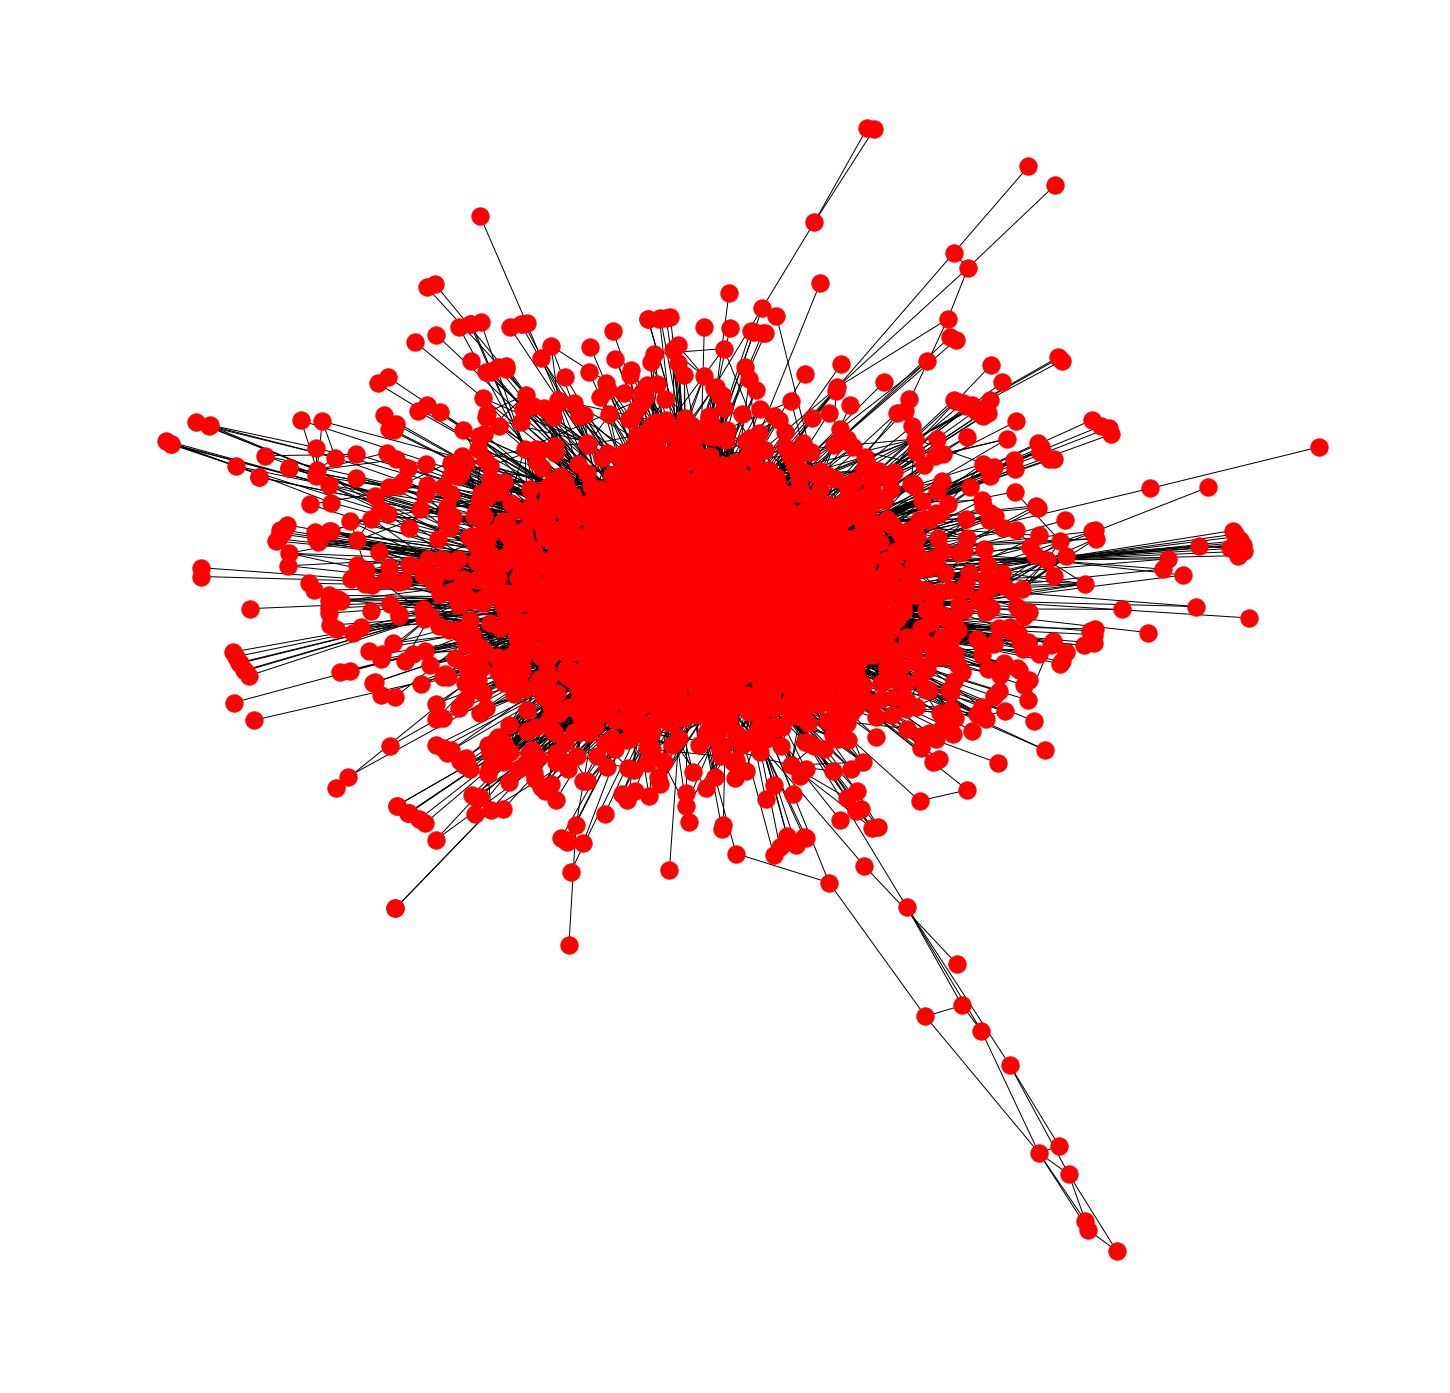

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
s = four_G
anchor_known_list = f_anchor_known_list
print(nx.info(s))
plt.figure(figsize=(25,25))
spring_pos = nx.spring_layout(s)
plt.axis("off")
# print(len(f_communities))

nx.draw(s, pos = spring_pos, with_label=False)
# nx.draw(four_G,pos = spring_pos, nodelist =f_communities[0], node_color = 'r')
# nx.draw(four_G,pos = spring_pos, nodelist = f_communities[1], node_color = '#f09494')
# nx.draw(four_G,pos = spring_pos, nodelist = f_communities[2], node_color = 'y')
# nx.draw(four_G,pos = spring_pos, nodelist = f_communities[3], node_color = 'b')
# # nx.draw(four_G,pos = spring_pos, nodelist = f_communities[4], node_color = 'g')
# # nx.draw(four_G,pos = spring_pos, nodelist = f_communities[5], node_color = 'g')
# # nx.draw(four_G,pos = spring_pos, nodelist = f_communities[6], node_color = 'g')
# # nx.draw(four_G,pos = spring_pos, nodelist = f_communities[7], node_color = 'g')
# for item in [v for v in anchor_known_list if not s.has_node(v)]:
#     anchor_known_list.remove(item)
# # print(anchor_known_list, len(anchor_known_list))
# # 随机选取百分之三的anchor user
# print(len(anchor_known_list))
nx.draw(s,pos = spring_pos, nodelist = anchor_known_list, node_color = 'g')
plt.show()

# test plotly


In [ ]:
# 地理位置的地图展示
import folium
# mapa = folium.Map(tiles="Cartodb dark_matter", location=[0, 0], zoom_start=2)


# for country, location in positions.items():
#     times = int(all_books[country])
#     popup = "{} was mentioned {} times.".format(country, times)
#     mapa.simple_marker(location=location, popup=popup,
#                        marker_icon="ok",
#                        marker_color="orange",
#                        clustered_marker=True)
# mapa
for e in location:
    folium.RegularPolygonMarker(
    [e[0],e[1]],
    popup=str(i)+":"+e[0]+e[1],
    fill_color='#769d96',
    number_of_sides=8,
    radius=10
    ).add_to(oneUserMap)
    i+=1
line_to_hanoi = folium.PolyLine(
    location
    color = black
).add_to(oneUserMap)
oneUserMap

# 对于单个用户的整个相似度分析

In [23]:
# 直接对用户进行分区，根据其地址的相似性
import requests
import json

def get_city(location):
    r = requests.get(url='http://api.map.baidu.com/geocoder/v2/', params={'location':location,'ak':'9ob1YaUCIxuQkxGEP5qjRwlutG554AYE','output':'json'})
    result = r.json()
    try:
        city = result['result']['addressComponent']['city']
        return city
    except:
        return None

for item in four_G.nodes(data=True):
    if(item[1]["in_test"] == 1):
        tw = item[1]["twitterID"]
        locationlist = list(set(item[1]["location"].split(',')))
        locationlist = [v.replace('_',',') for v in locationlist]
        four_city=[]
        for i in locationlist:
            four_city.append(get_city(i))
        locationlist = list(set(tw_G.node[tw]["location"].split(',')))
        locationlist = [v.replace('_',',') for v in locationlist]
        tw_city=[]
        for i in locationlist:
            tw_city.append(get_city(i))
        four_city = list(set(four_city))
        tw_city = list(set(tw_city))
        break

In [106]:
# 将所有的节点放进一个大网

import re
import networkx as nx
import random

full_network = nx.DiGraph()
tw_test_G = nx.DiGraph()
four_test_G = nx.DiGraph()
f_anchor_known_list = [] # 设定的事先知道的anchor link foursquare
t_anchor_known_list = [] # 设定的事先知道的anchor link twitter
f_all_known_list = []    # 数据集中所有的foursqauare anchor user
t_all_known_list = []    # 数据集中所有的twitter anchor user

f = open('foursquare/users/user', encoding='utf-8')
twitter_file = open('twitter/user', encoding='utf-8')
for line in twitter_file:
    tw_list = line.split('\t')
    user_name = tw_list[0]
    if(len(user_name) > 1 and len(tw_list) >= 5):
        full_network.add_node(user_name, nodeType="twitter")

# random_list = []   # 随机生成提前知道的anchor user数
# random_num = 300   # 控制已知数量
# random_list = random.sample(range(1,1588), 300)
# print(random_list)
print(nx.info(full_network))
random_list = [1376, 1577, 552, 244, 1384, 1464, 959, 413, 1171, 1420, 149, 126, 658, 607, 867, 896, 1322, 129, 1111, 91, 573, 664, 721, 529, 1172, 1490, 146, 45, 852, 1424, 1284, 1186, 1407, 131, 698, 967, 1562, 991, 893, 838, 929, 1255, 1238, 772, 503, 626, 1181, 753, 1218, 1405, 433, 254, 470, 1326, 932, 1461, 653, 922, 563, 973, 1259, 1413, 297, 1551, 259, 106, 326, 382, 538, 613, 163, 392, 532, 787, 1294, 724, 1305, 1264, 348, 518, 936, 811, 543, 667, 100, 1340, 457, 745, 311, 1211, 1018, 204, 707, 230, 1053, 1266, 968, 1363, 1309, 568, 1275, 362, 1183, 451, 940, 1558, 1177, 332, 1569, 402, 209, 172, 812, 240, 1165, 1365, 272, 747, 27, 1071, 1452, 768, 171, 1578, 541, 1196, 545, 110, 1225, 1581, 280, 1098, 1005, 1076, 1587, 964, 884, 182, 505, 1145, 1100, 125, 1526, 662, 1338, 506, 988, 1121, 201, 638, 1110, 1096, 134, 1006, 782, 422, 234, 601, 955, 1178, 1362, 1227, 1306, 752, 1187, 498, 885, 236, 1013, 550, 1441, 630, 557, 1542, 1492, 700, 36, 1483, 741, 1380, 1108, 1067, 39, 1512, 1094, 246, 1330, 13, 208, 274, 800, 194, 1136, 985, 1538, 222, 471, 536, 1214, 925, 327, 1175, 558, 3, 1507, 587, 710, 750, 456, 339, 919, 416, 717, 18, 1524, 819, 1398, 909, 1343, 668, 1160, 82, 196, 858, 687, 521, 690, 764, 130, 76, 1570, 742, 703, 406, 440, 1455, 1310, 6, 1534, 831, 1499, 993, 67, 384, 842, 1386, 35, 1514, 410, 1285, 1194, 652, 1423, 183, 866, 89, 320, 104, 1052, 1428, 140, 760, 1437, 978, 1085, 1003, 376, 1367, 459, 1480, 341, 323, 176, 421, 108, 1307, 359, 1395, 599, 64, 1025, 85, 1212, 933, 334, 158, 271, 79, 1010, 1021, 112, 1256, 1180, 1576, 1139, 1529, 1011, 1323, 879, 559]


# foursquare 目前只将对应的twitterid存了进去，其它的属性未存\n",  location=tw_list[4],  realname=tw_list[2], bio=tw_list[3], home=tw_list[4],
num = 0
for line in f:
    lis = line.split('\t')
    userFourID = lis[0]
    if('com' in lis[7]):
        userTwitterID = lis[7].split('twitter.com/')[1]
        if(full_network.has_node(userTwitterID)):
            num+=1
            full_network.node[userTwitterID]["nodeType"] = "anchor"
            f_all_known_list.append(userFourID)
            t_all_known_list.append(userTwitterID)

            # 测试五折交叉的全对齐网络
            if(num in random_list):
                f_anchor_known_list.append(userFourID)
                t_anchor_known_list.append(userTwitterID)
        else:
            full_network.add_node(userFourID, nodeType="Foursquare")
print("length of already known anchor list:", len(f_anchor_known_list), len(t_anchor_known_list))
f.close()
twitter_file.close()
# # remove to full aligned twitter network
# remove_node_list = []
# for item in tw_G.nodes(data=True):
#     if(item[1]["in_test"] != 1):
#         remove_node_list.append(item[0])
# tw_G.remove_nodes_from(remove_node_list)

# 对于twitter的节点进行处理，进行去边缘化
tw_f = open('twitter/following')
for line in tw_f:
    user1 = line.split('\t')[0]
    user2 = line.split('\t')[1].split('\n')[0]
    if(full_network.has_node(user1) and full_network.has_node(user2)):
        full_network.add_edge(user1, user2)
f = open('foursquare/users/user_following')
for line in f:
    user1 = line.split('\t')[0]
    user2 = line.split('\t')[1].split('\n')[0]
    if(full_network.has_node(user1) and full_network.has_node(user2)):
        full_network.add_edge(user1, user2)
print(nx.info(full_network))
# 有 1588个 anchor user，抽样？一部分作为测试集，一部分作为训练集

Name: 
Type: DiGraph
Number of nodes: 4895
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
length of already known anchor list: 300 300
Name: 
Type: DiGraph
Number of nodes: 6695
Number of edges: 193044
Average in degree:  28.8341
Average out degree:  28.8341


In [ ]:
# 将twitter和foursqure的用户和用户属性存入，并且在foursquare图中存入已知的anchor links
# 因为假设是基于full-aligned social network，所以只选取anchor users组成网络
# 是在全对齐上假设结果比较好，源数据集信息并不进行改动的结果比较好？
# 在互相关注和单向关注这样的切面考虑，在此基础上寻找特征进行训练
# 训练的方式怎么确定？几折交叉验证的数据集训练集过大的问题？
# 用户人数/follow关系链接数，到达一个比列留单向还是双向的
# 协同过滤或者simrank

import re
import networkx as nx
import random

four_G = nx.Graph()      # 无向图 
tw_G = nx.Graph()
f_anchor_known_list = [] # 设定的事先知道的anchor link foursquare
t_anchor_known_list = [] # 设定的事先知道的anchor link twitter
f_all_known_list = []    # 数据集中所有的foursqauare anchor user
t_all_known_list = []    # 数据集中所有的twitter anchor user
# 
f = open('foursquare/users/user', encoding='utf-8')
twitter_file = open('twitter/user', encoding='utf-8')
for line in twitter_file:
    tw_list = line.split('\t')
    user_name = tw_list[0]
    if(len(user_name) > 1 and len(tw_list) >= 5):
        tw_G.add_node(user_name, in_test=0, time='',location='', word='', fourID=None)
        tw_Di_G.add_node(user_name)

# random_list = []   # 随机生成提前知道的anchor user数
# random_num = 400   # 控制已知数量
# random_list = random.sample(range(1,1588), random_num)
# print(random_list)
# # random_list = [1376, 1577, 552, 244, 1384, 1464, 959, 413, 1171, 1420, 149, 126, 658, 607, 867, 896, 1322, 129, 1111, 91, 573, 664, 721, 529, 1172, 1490, 146, 45, 852, 1424, 1284, 1186, 1407, 131, 698, 967, 1562, 991, 893, 838, 929, 1255, 1238, 772, 503, 626, 1181, 753, 1218, 1405, 433, 254, 470, 1326, 932, 1461, 653, 922, 563, 973, 1259, 1413, 297, 1551, 259, 106, 326, 382, 538, 613, 163, 392, 532, 787, 1294, 724, 1305, 1264, 348, 518, 936, 811, 543, 667, 100, 1340, 457, 745, 311, 1211, 1018, 204, 707, 230, 1053, 1266, 968, 1363, 1309, 568, 1275, 362, 1183, 451, 940, 1558, 1177, 332, 1569, 402, 209, 172, 812, 240, 1165, 1365, 272, 747, 27, 1071, 1452, 768, 171, 1578, 541, 1196, 545, 110, 1225, 1581, 280, 1098, 1005, 1076, 1587, 964, 884, 182, 505, 1145, 1100, 125, 1526, 662, 1338, 506, 988, 1121, 201, 638, 1110, 1096, 134, 1006, 782, 422, 234, 601, 955, 1178, 1362, 1227, 1306, 752, 1187, 498, 885, 236, 1013, 550, 1441, 630, 557, 1542, 1492, 700, 36, 1483, 741, 1380, 1108, 1067, 39, 1512, 1094, 246, 1330, 13, 208, 274, 800, 194, 1136, 985, 1538, 222, 471, 536, 1214, 925, 327, 1175, 558, 3, 1507, 587, 710, 750, 456, 339, 919, 416, 717, 18, 1524, 819, 1398, 909, 1343, 668, 1160, 82, 196, 858, 687, 521, 690, 764, 130, 76, 1570, 742, 703, 406, 440, 1455, 1310, 6, 1534, 831, 1499, 993, 67, 384, 842, 1386, 35, 1514, 410, 1285, 1194, 652, 1423, 183, 866, 89, 320, 104, 1052, 1428, 140, 760, 1437, 978, 1085, 1003, 376, 1367, 459, 1480, 341, 323, 176, 421, 108, 1307, 359, 1395, 599, 64, 1025, 85, 1212, 933, 334, 158, 271, 79, 1010, 1021, 112, 1256, 1180, 1576, 1139, 1529, 1011, 1323, 879, 559]
random_list = [1376, 1577, 552, 244, 1384, 1464, 959, 413, 1171, 1420, 149, 126, 658, 607, 867, 896, 1322, 129, 1111, 91, 573, 664, 721, 529, 1172, 1490, 146, 45, 852, 1424, 1284, 1186, 1407, 131, 698, 967, 1562, 991, 893, 838, 929, 1255, 1238, 772, 503, 626, 1181, 753, 1218, 1405, 433, 254, 470, 1326, 932, 1461, 653, 922, 563, 973, 1259, 1413, 297, 1551, 259, 106, 326, 382, 538, 613, 163, 392, 532, 787, 1294, 724, 1305, 1264, 348, 518, 936, 811, 543, 667, 100, 1340, 457, 745, 311, 1211, 1018, 204, 707, 230, 1053, 1266, 968, 1363, 1309, 568, 1275, 362, 1183, 451, 940, 1558, 1177, 332, 1569, 402, 209, 172, 812, 240, 1165, 1365, 272, 747, 27, 1071, 1452, 768, 171, 1578, 541, 1196, 545, 110, 1225, 1581, 280, 1098, 1005, 1076, 1587, 964, 884, 182, 505, 1145, 1100, 125, 1526, 662, 1338, 506, 988, 1121, 201, 638, 1110, 1096, 134, 1006, 782, 422, 234, 601, 955, 1178, 1362, 1227, 1306, 752, 1187, 498, 885, 236, 1013, 550, 1441, 630, 557, 1542, 1492, 700, 36, 1483, 741, 1380, 1108, 1067, 39, 1512, 1094, 246, 1330, 13, 208, 274, 800, 194, 1136, 985, 1538, 222, 471, 536, 1214, 925, 327, 1175, 558, 3, 1507, 587, 710, 750, 456, 339, 919, 416, 717, 18, 1524, 819, 1398, 909, 1343, 668, 1160, 82, 196, 858, 687, 521, 690, 764, 130, 76, 1570, 742, 703, 406, 440, 1455, 1310, 6, 1534, 831, 1499, 993, 67, 384, 842, 1386, 35, 1514, 410, 1285, 1194, 652, 1423, 183, 866, 89, 320, 104, 1052, 1428, 140, 760, 1437, 978, 1085, 1003, 376, 1367, 459, 1480, 341, 323, 176, 421, 108, 1307, 359, 1395, 599, 64, 1025, 85, 1212, 933, 334, 158, 271, 79, 1010, 1021, 112, 1256, 1180, 1576, 1139, 1529, 1011, 1323, 879, 559]

# foursquare 目前只将对应的twitterid存了进去，其它的属性未存\n",  location=tw_list[4],  realname=tw_list[2], bio=tw_list[3], home=tw_list[4],
num = 0
for line in f:
    lis = line.split('\t')
    userFourID = lis[0]
    if('com' in lis[7]):
        userTwitterID = lis[7].split('twitter.com/')[1]
        if(tw_G.has_node(userTwitterID)):
            num = num + 1
            four_G.add_node(userFourID, twitterID=userTwitterID, location='', time='', word='', in_test=0)
            four_Di_G.add_node(userFourID)
            tw_G.node[userTwitterID]["in_test"] = 1           # 标明tw有对应的foursquare账号，用在取全对齐网络
            tw_G.node[userTwitterID]["fourID"] = userFourID   # 标明 tw对应的four ID
            f_all_known_list.append(userFourID)
            t_all_known_list.append(userTwitterID)
            # 测试五折交叉的全对齐网络
            if(num in random_list): 
                four_G.node[userFourID]["in_test"] = 1        # 这个代表它的anchor link事先知道
                f_anchor_known_list.append(userFourID)
                t_anchor_known_list.append(userTwitterID)
        else:
            four_G.add_node(userFourID, twitterID=None, location='', time='', word='', in_test=0)   # 这里在后面考虑是否需要加进去，加进去就是partial aligned
            four_Di_G.add_node(userFourID)
print("length of already known anchor list:", len(f_anchor_known_list), len(t_anchor_known_list))
f.close()
twitter_file.close()
# # remove to full aligned twitter network
# remove_node_list = []
# for item in tw_G.nodes(data=True):
#     if(item[1]["in_test"] != 1):
#         remove_node_list.append(item[0])
# tw_G.remove_nodes_from(remove_node_list)

# 对于twitter的节点进行处理，进行去边缘化
tw_f = open('twitter/following')
for line in tw_f:
    user1 = line.split('\t')[0]
    user2 = line.split('\t')[1].split('\n')[0]
    if(tw_G.has_node(user1) and tw_G.has_node(user2)):
        if(tw_G.has_edge(user2, user1)):
            tw_G.edges[user2, user1]["weight"] = 2
            if(user1 in t_anchor_known_list and user2 in f_anchor_known_list):
                f_user1 = tw_G.node[user1]["fourID"]
                f_user2 = tw_G.node[user2]["fourID"]
                four_G.add_edge(f_user1, f_user2, weight=2)
        else:
            tw_G.add_edge(user1, user2, weight=1)
            if(user1 in t_anchor_known_list and user2 in f_anchor_known_list):
                f_user1 = tw_G.node[user1]["fourID"]
                f_user2 = tw_G.node[user2]["fourID"]
                four_G.add_edge(f_user1, f_user2, weight=1)
tw_f.close()
# 有 1588个 anchor user，抽样？一部分作为测试集，一部分作为训练集

# from networkx.algorithms.community.kclique import k_clique_communities

# # 删除边缘节点，在单向关系存在的基础上
# def del_boundary(G, k):
#     # 删除边缘节点，控制边的入度出度的参数
#     vdict = G.in_degree()         #dictionary of nodes and their in_degrees
#     voutdict = G.out_degree()     #directionary of nodes and their out_degree
#     # 删除入度和出度小于5的点，也就是关注人和被人关注小于五的点
#     G.remove_nodes_from([v for v in G if vdict[v]<k and voutdict[v]<k])
#     return G.to_undirected()

# # k_clique社区聚类
# def k_clique(G, k):
#     communities = list(k_clique_communities(G, k))
#     return communities

# # 根据经验信息和已知的anchor link在两个网络中扩展边
# def extend_network(four_G, tw_G):
#     pass

# 只留相互follow的作为关系
f = open('foursquare/users/user_following')
for line in f:
    user1 = line.split('\t')[0]
    user2 = line.split('\t')[1].split('\n')[0]
    if(four_G.has_node(user1) and four_G.has_node(user2)):
        if(four_G.has_edge(user2, user1)):
            four_G.edges[user2, user1]["weight"] = 2
            if(user1 in f_anchor_known_list and user2 in f_anchor_known_list):
                t_user1 = four_G.node[user1]["twitterID"]
                t_user2 = four_G.node[user2]["twitterID"]
                if(tw_G.has_edge(t_user1, t_user2)):
                    tw_G.edges[t_user2, t_user1]["weight"] = 2
        else:
            four_G.add_edge(user1, user2, weight=1)
            if(user1 in f_anchor_known_list and user2 in f_anchor_known_list):
                t_user1 = four_G.node[user1]["twitterID"]
                t_user2 = four_G.node[user2]["twitterID"]
                tw_G.add_edge(t_user1, t_user2, weight=1)

# foursquare不去掉单向边关系
# four_G.remove_edges_from([e for e in four_G.edges() if four_G.edges[e]["weight"]==1])
# vdict = four_G.degree()
# four_G.remove_nodes_from([v for v in four_G if vdict[v] < 3])
# print("-----------------------------------------------")
# # 控制参数去除边缘节点，并进行k-clique进行社区发现
# four_G = del_boundary(four_G, 5)
# t_communities = k_clique(tw_G, 9)
# tw_G = del_boundary(tw_G, 5)
# k_clique社区聚类

# twitter中删除单向的链接
tw_G.remove_edges_from([e for e in tw_G.edges() if tw_G.edges[e]["weight"]==1])
print(nx.info(tw_G), nx.info(four_G),nx.info(tw_Di_G),nx.info(four_Di_G))
# 1588个相互都存在的anchor user

f = open("20180419_iter/train_notaligned_positive2.txt", 'a')
f1 = open("20180419_iter/train_notaligned_unknown2.txt", 'a')
for item in four_G.nodes(data=True):
    for item1 in tw_G.nodes(data=True):
        if(True):
#         if(item[0] == 'zz01pr' and item1[0] == 'zz01pr'):
#             print(item[0])
#         if(item[0] in f_all_known_list and item1[0] in t_all_known_list):   # 只计算对齐用户间的链接构建训练集和测试集
#             # 时间特征
#             time_sim = get_shared_time_slot(dict(item[1])["time"],dict(item1[1])["time"])
#             # 空间特征
#             dis_sim = get_common_location(dict(item[1])["location"],dict(item1[1])["location"])
            # 语言特征
#             word_sim = tf_idf(dict(item[1])["word"],dict(item1[1])["word"])
            # 结构特征
#             encli = euclidean(dict(item[1])["pathlenlist"], dict(item1[1])["pathlenlist"])
            f_real_nei = list(four_G.neighbors(item[0]))
            f_nei=[]
            com_nei=[]
            for i in f_real_nei:
                if(four_G.node[i]["in_test"] == 1):    # foursquare中哪些是已知的
                    f_nei.append(four_G.node[i]["twitterID"])
                    com_nei.append(i)
            t_nei = list(tw_G.neighbors(item1[0]))
            result = [v for v in t_nei if v in f_nei]   # 共同的已知的neighbor的多少
            length = len(com_nei)
            res_four = []
            for i in range(0,length):
                if(f_nei[i] in result):
                    res_four.append(com_nei[i])
            CN = len(result)
            if((len(f_real_nei)+len(t_nei)-CN)>0):
                JC = CN/(len(f_real_nei)+len(t_nei)-CN)
            else:
                JC = 0
            AA = 0
            for i in res_four:
                jh = len(list(four_G.neighbors(i)))+len(list(tw_G.neighbors(four_G.node[i]["twitterID"])))
                if(jh!=2):
                    AA = AA + 1/math.log(jh/2)
            social_feature = (CN+JC+AA)/3
            label = 0
            if(item1[0] == item[1]["twitterID"]):
                label = 1
#             s = item[0]+','+item1[0]+','+str(social_feature)+','+str(time_sim)+','+str(dis_sim)+','+str(label)+'\n'
            s = item[0]+','+item1[0]+','+str(social_feature)+','+str(label)+'\n'
            if(label==1):
                f.write(s)
            else:
                f1.write(s)
f.close()
f1.close()
from svm import *
from svmutil import *

# 训练集
# positive的数据
f = open("20180411_iter/train_notaligned_positive.txt")
y = []
x = []
for line in f:
    if(line.split(',')[0] in f_anchor_known_list):   # 控制positiive的参数
        y.append(1)
    #     x.append({1:float(line.split(',')[2]),2:float(line.split(',')[3]),3:float(line.split(',')[4])})
        x.append([float(line.split(',')[2])])

f.close()
# unknown的数据，抽样一部分作为negative
f = open("20180411_iter/train_notaligned_unknown.txt")
num=0
for line in f:
    if(line.split(',')[0] in f_anchor_known_list or line.split(',')[1] in t_anchor_known_list):   # 控制positiive的参数
        y.append(0)
        x.append([float(line.split(',')[2])])
        num = num + 1
f.close()
#         x.append({1:float(line.split(',')[2]),2:float(line.split(',')[3]),3:float(line.split(',')[4])})
# prob  = svm_problem(y, x)
# # -t为选择核函数类型，0为线性，其它全设置为默认参数不调整（论文中设置），核函数需要能输出概率值的
# param = svm_parameter('-b 1')
# model = svm_train(prob, param)

# 测试集
name = []
yt = []
xt = []
num = 1
f1 = open("20180411_iter/train_notaligned_positive.txt")
for line in f1:
    if(line.split(',')[0] not in f_anchor_known_list):   # 控制positiive的参数
        yt.append(1)
        xt.append([float(line.split(',')[2])])
#         xt.append({1:float(line.split(',')[2]),2:float(line.split(',')[3]),3:float(line.split(',')[4])})
        name.append(line.split(',')[0]+';'+line.split(',')[1])
        num = num + 1
f1.close()
num = 0
f = open("20180411_iter/train_notaligned_unknown.txt")
for line in f:
    if(line.split(',')[0] not in f_anchor_known_list and line.split(',')[1] not in t_anchor_known_list):
        yt.append(0)
        xt.append([float(line.split(',')[2])])
#         xt.append({1:float(line.split(',')[2]),2:float(line.split(',')[3]),3:float(line.split(',')[4])})
        name.append(line.split(',')[0]+';'+line.split(',')[1])
        num = num + 1
f.close()
# f2 = open("result13.txt", 'a')
# p_label, p_acc, p_val = svm_predict(yt, xt, model, '-b 1')
# for i in range(0,len(p_label)):
#     f2.write(name[i]+';'+str(p_label[i])+';'+str(p_val[i])+'\n')
# 随机森林训练
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score

clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
clf = clf.fit(x,y)
print(clf.feature_importances_)  # 每个特征的重要性
# scores2 = cross_val_score(clf, xt)   [ 0.90482199  0.09517801  0.        ]
s = clf.predict_proba(xt)
print(len(xt))
f2 = open("20180411_iter/result_social_test2.txt", 'a')
for i in range(0,len(s)):
    f2.write(name[i]+';'+str([s[i][0],s[i][1]])+'\n')
f2.close()
# 产生配对的dict，设置k为3 four,tw 1,0，这里设置k
four_result_list = {}
tw_result_list = {}

predict_list =  [] # 训练集和测试集要按照人来分
k = 2
f = open("20180411_iter/result_social_test2.txt", 'r')
for line in f:
    x_list = line.split(';')
    if(len(x_list) == 3):
        rate = eval(x_list[2])[0]
        if(x_list[0] in four_result_list):
            cur_per_list = four_result_list[x_list[0]][0]       # 喜爱的twitter排名
            four_result_list[x_list[0]][0].append(rate)
            four_result_list[x_list[0]][1].append(x_list[1])    # 对应的twitter名
        else:
            four_result_list[x_list[0]] = [[rate], [x_list[1]]]
        if(x_list[1] in tw_result_list):
            cur_per_list = tw_result_list[x_list[1]][0]       # 喜爱的twitter排名
            tw_result_list[x_list[1]][0].append(rate)
            tw_result_list[x_list[1]][1].append(x_list[0])  # 对应的twitter名
        else:
            tw_result_list[x_list[1]] = [[rate], [x_list[0]]] 

for item in four_result_list.keys():
    s = dict()
    for i in range(0,len(four_result_list[item][1])):
        s[four_result_list[item][1][i]] = four_result_list[item][0][i]
    s = sorted(s.items(), key=lambda item:item[1], reverse=True)
    s = map(lambda x:x[0], s)
    four_result_list[item] = list(s)
    if(len(four_result_list[item]) > 0):
        four_result_list[item] = four_result_list[item][0:1]

for item in tw_result_list.keys():
    s = dict()
    for i in range(0,len(tw_result_list[item][1])):
        s[tw_result_list[item][1][i]] = tw_result_list[item][0][i]
    s = sorted(s.items(), key=lambda item:item[1], reverse=True)
    s = map(lambda x:x[0], s)
    tw_result_list[item] = list(s)
    if(len(tw_result_list[item]) > 0):
        tw_result_list[item] = tw_result_list[item][0:1]
f.close()

manprefers = tw_result_list            # dict形式，方便找人
womanprefers = four_result_list 
women = sorted(womanprefers.keys())    # list形式
men = sorted(manprefers.keys())


def match():
    manfree = men[:] # twitter user who is free (not engaged)
    engaged = {}     # map woman:man的格式, 也就是anchor的配对
    while manfree:   # still some man is free而且还没达到k的标准，是在list处就处理好的
        man = manfree.pop(0)
        if(man not in t_anchor_known_list):
            manlist = manprefers[man]   # twitter用户对应的fourlist
            woman = manlist.pop(0)      # 弹出最想要配对的对象
            flag = 1
            while(woman in f_anchor_known_list):
                if(len(manlist) == 0):
                    flag = 0
                    break
                else:
                    woman = manlist.pop(0)
            if(flag==1):
                fiance = engaged.get(woman) # 目前的four对象
                womanlist = womanprefers[woman]   # 最想要配对的four用户的twlist
                if not fiance and man in womanlist:
                    # the woman is free
                    engaged[woman] = man
                else:
                    if(man in womanlist):
                        if womanlist.index(fiance) > womanlist.index(man):
                            # the woman is not free but she prefers this man rather than her old fiance
                            engaged[woman] = man
                            if manprefers[fiance]:
                                manfree.append(fiance)
                        else:
                            # she is faithful to her old fiance
                            if manlist:            # 他还要想要配对的人选，否则对应单身
                                manfree.append(man)
    return engaged

engage = match()
num = 0    # 正确判断的anchor num
sums = 0   # 所有判断的anchor num
for item in engage.keys():
    if(item == engage[item]):
        if(item not in f_anchor_known_list):
            num = num + 1
    sums = sums + 1
print(num, sums)

In [ ]:
# svm模型
prob = svm_problem(y, x)
# -t为选择核函数类型，0为线性，其它全设置为默认参数不调整
param = svm_parameter('-t 0')
model = svm_train(prob, param, '-h 0')
p_label, p_acc, p_val = svm_predict(yt, xt, model, '-b 0')
classify_result = []
for i in range(0, len(p_label)):
    classify_result.append(self.feature.name[i] + ';' + str([p_val[i], 0]))
